Task 4 was to create a random number generator. The algorithm used for random number generation is the linear congruent method. Several tests were then written for assessing the randomness of the pseudo random number generator.

250  random numbers generated


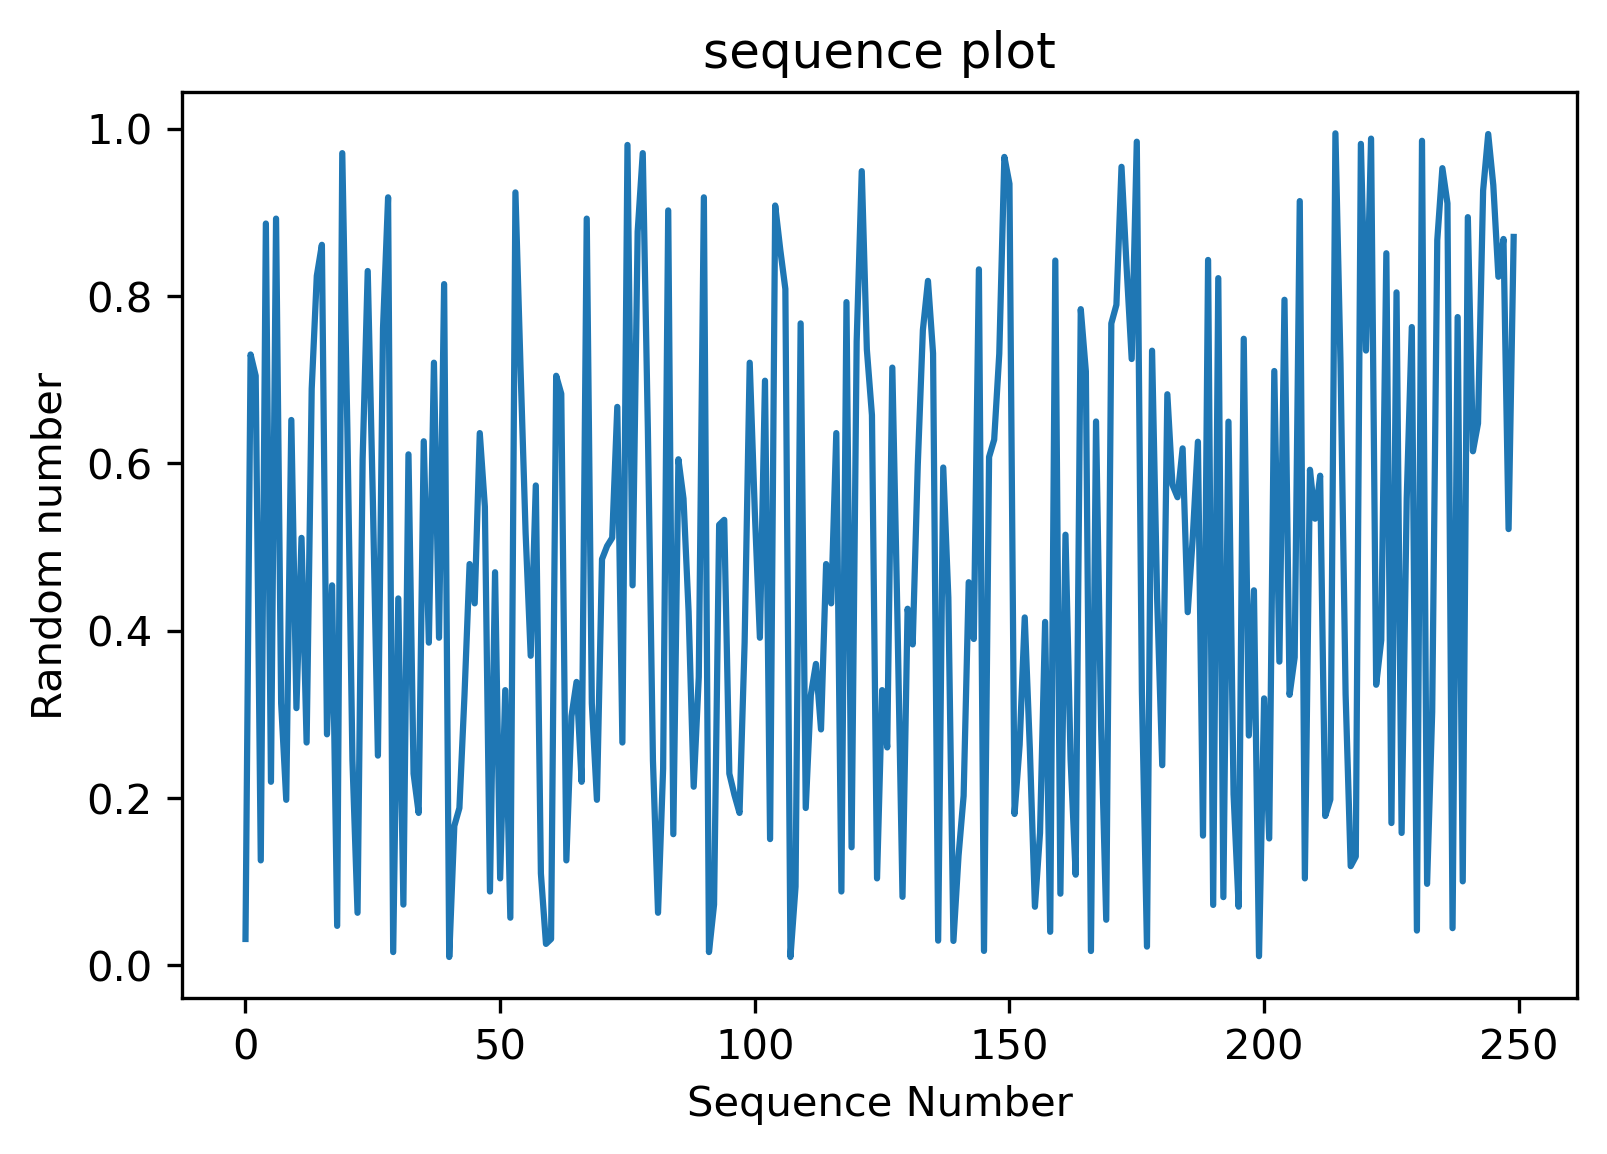

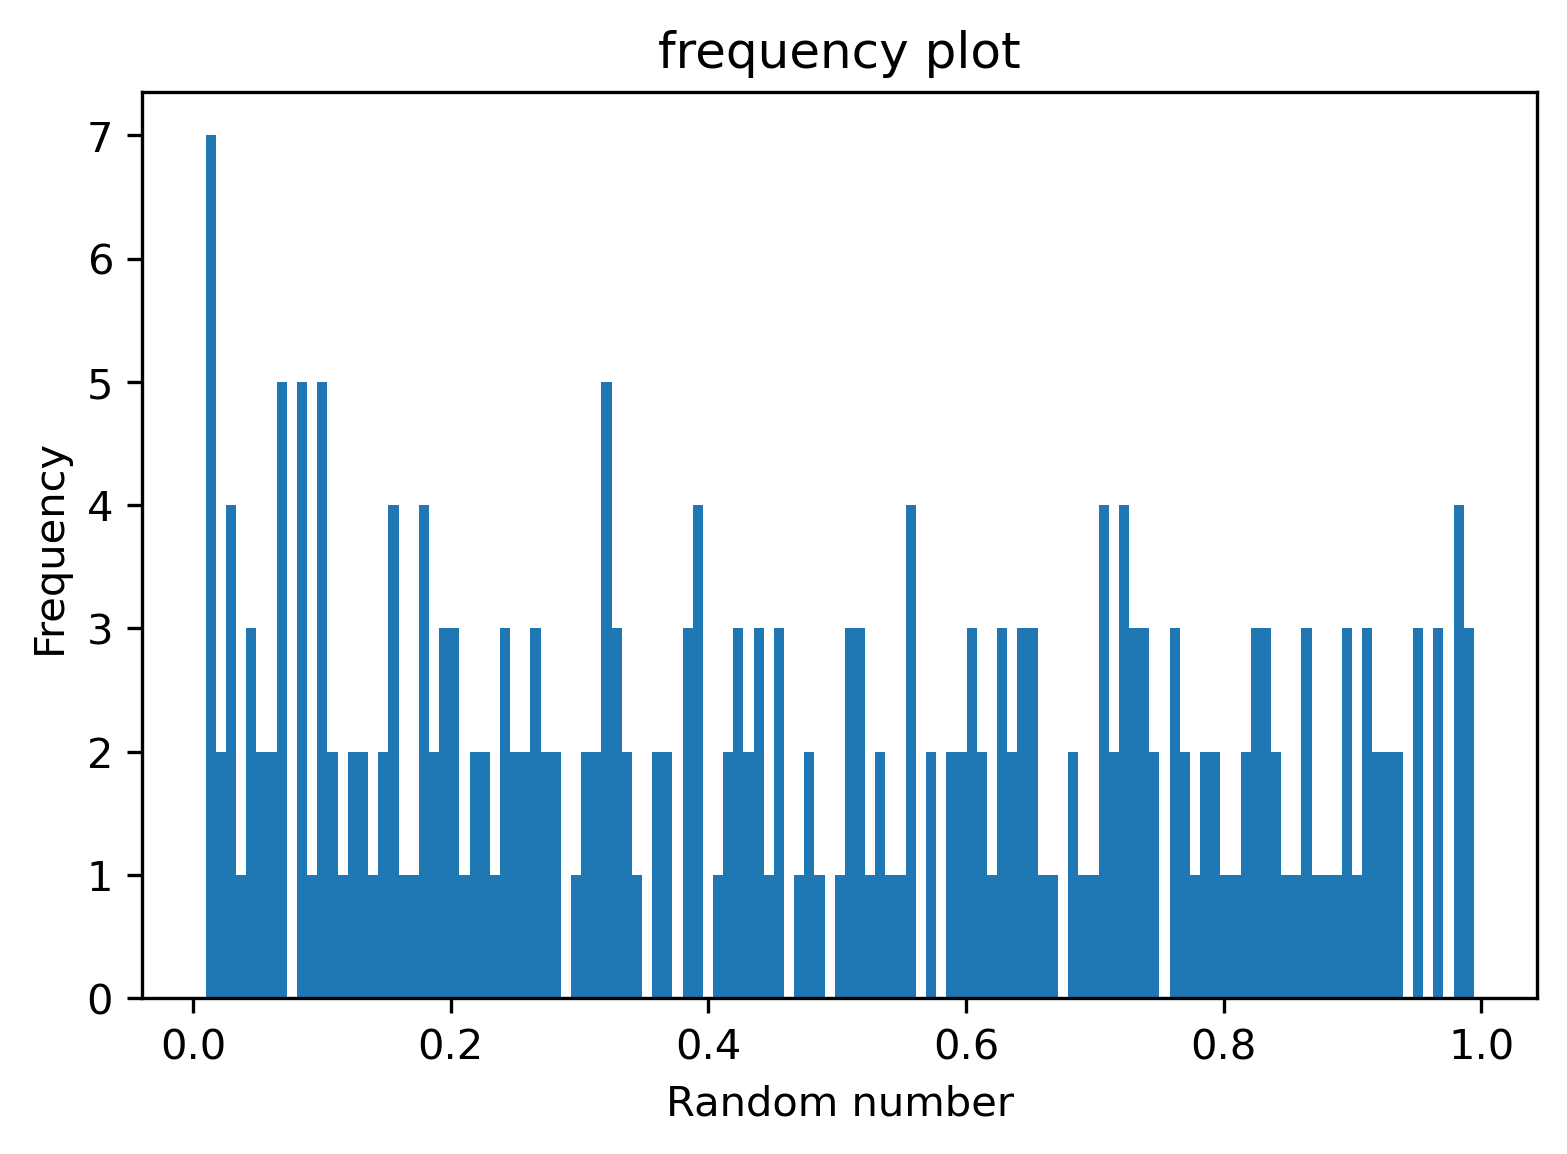

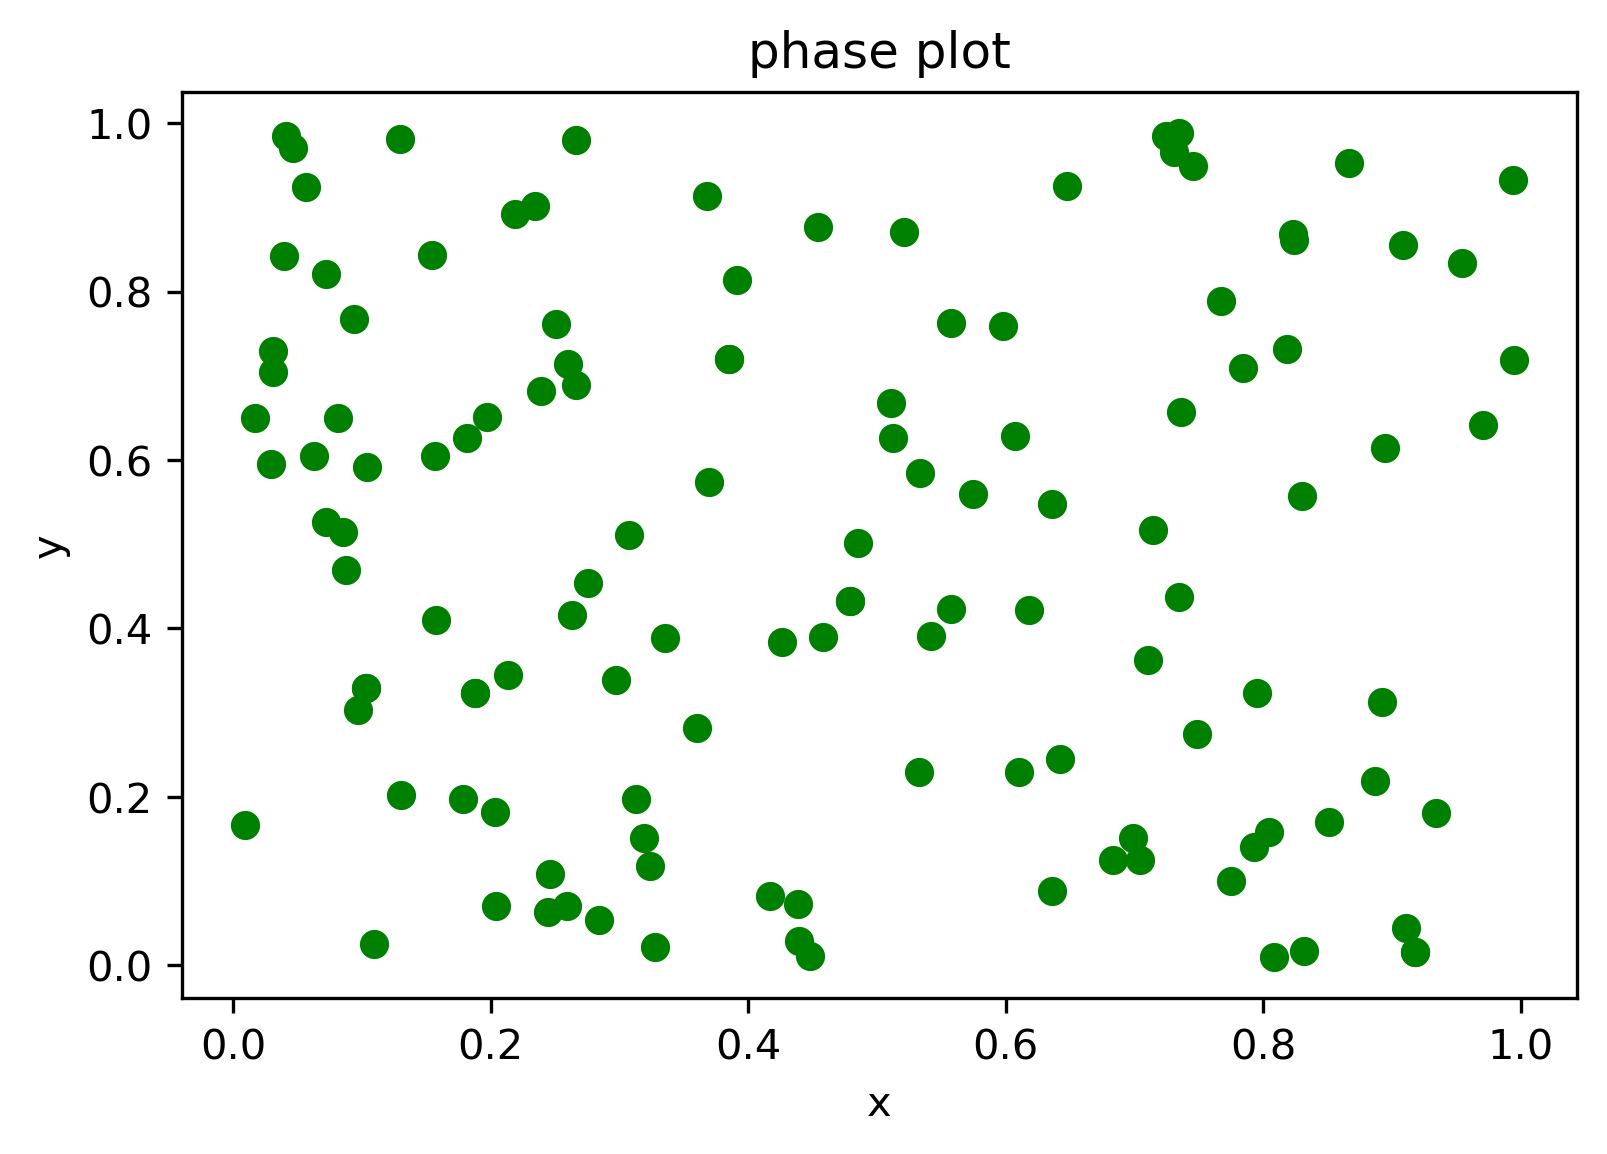

moment for 1 th moment: 0.42363493549037184
nearest neighbour correlation for 1 th term: 0.21971143855855138
runtime: 0.6808187961578369 seconds


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time as t

start = t.time()#start time counter

plt.rcParams['figure.dpi'] = 300#increases resolution of matplotlib plots


class randomAnalysis():
    
    def __init__(self,a,c,rinitial,M):#initialisation parameters for the class
        self.a = a        #multiplicative constant
        self.c = c        #added constant
        self.rc = rinitial#starting seed/number
        self.m = M        #modulus
    
    def sequencePlot(self):
        self.nol = np.arange(0,self.l,1)#makes a numpy array from o to self.l(not including self.l), with stepsize of 1 
        plt.title("sequence plot")
        plt.xlabel("Sequence Number")
        plt.ylabel("Random number")
        plt.plot(self.nol,self.R)
        plt.show()
        
        """
        Above function plots random number against
        sequence number. Note self.l is the number of
        random numbers being generated.
        """
    
    def histogramPlot(self):
        plt.title("frequency plot")
        plt.xlabel("Random number")
        plt.ylabel("Frequency")
        plt.hist(self.R,bins=self.l//2)#bins is the number of bars in the histogram, // is floor division
        plt.show()
        
        """
        Above function plots frequency of each
        range of random number as a histogram.
        """
    
    def phasePlot(self):
        self.X1 = self.R[::2] #X1 is all even indexes of self.R
        self.Y1 = self.R[1::2]#Y1 is all odd indexes of self.R
        plt.title("phase plot")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.plot(self.X1,self.Y1, 'go')#'go' is for green dots on the plot
        plt.show()

        """
        Above function is the 
        phase plot of all odd numbered position indexes
        against all even numbered position indexes
        in the sequence of random numbers generated,
        self.R
        """

    def momentGen(self,K):
        self.k = K#kth moment
        self.moment = 0.0
        m1 = 1/(self.k+1)
        for i in range(0,self.l):#calulating the sum part of the equation
            self.moment += self.R[i]**self.k
        self.moment = np.sqrt(self.l)*(abs((self.moment/self.l) -m1))
        print("moment for",self.k,"th moment:",self.moment)
        
        """
        Above function calculates the kth moment
        of the sequence of random numbers.
        It uses the equation given in the session 3 lecture
        notes on learn. Result should be of the order of 1.
        """

    def neighbours(self,K):
        self.k = K#kth term in equation
        self.neigh = 0.0
        for i in range(0,(self.l-self.k)):#calulating the sum part of the equation
            self.neigh += self.R[i]*self.R[i+self.k]
        self.neigh = (1/self.l)*self.neigh
        print("nearest neighbour correlation for",self.k,"th term:",self.neigh)
        
        """
        Above function calculates the nearest neighbour correlation
        of the sequence of random numbers.
        It uses the equation given in the session 3 lecture
        notes on learn.
        For an independent and uniform random number 
        distribution the nearest neighbour correlation 
        can be approximated to a 1/4.
        """
        

class randomMethods(randomAnalysis):#inherits methods from randomAnalysis
    
    def __init__(self,a,c,rinitial,M):
        super().__init__(a,c,rinitial,M)
        
    def genRand(self,length):
        self.l = length
        self.R = []
        self.R.append(self.rc/(self.m-1))
        for i in range(1,self.l):
            self.rc = ((self.rc*self.a+self.c)%self.m)
            self.R.append(self.rc/(self.m-1))#Normalises random number to be between 0 and 1 then appends to list
        return self.R
    
        """
        Above function generates a sequence of random
        numbers using the linear congruent method.
        Algorithm for linear congruent method was given
        in the session 3 lecture notes on learn
        """
    
    def pythonRand(self,length):
        self.l = length
        self.R = []
        self.R.append(self.rc/(self.m-1))
        for i in range(1,self.l):#generates self.l random numbers
            self.rc = random.random()#generate random number between 0 and 1
            self.R.append(self.rc)#append random number to list self.R
        return self.R

        """
        Above function generates a sequence of random
        numbers using the python random library.
        """
    
    def finalRand(self,length):
        self.l = length
        self.R = []
        u1 = randomMethods.genRand(self,self.l)#linear congruent random number list
        u2 = randomMethods.pythonRand(self,self.l)#python random number list
        self.R = [*u1,*u2]#concatenated list
        for i in range(0,self.l):
            self.R.pop(random.randint(0,len(self.R)-1))#removes self.l numbers from self.R at "random"
        return self.R
    
        """
        Above function takes the two random number
        generator functions outputs and concatenates them into one list.
        It then uses the python random library to remove half the values from
        the concatenated list. This drastically improves the randomness
        of this psuedo random number generator as evidenced in the phase plot.
        """   
        
def main():
    rando = randomMethods(119,5,16,512)#creating object
    llength = 250# passed into random number generator as self.l
    foo = randomMethods.finalRand(rando,llength)
    if len(foo)==llength:#verifies number of random numbers generated is equal to length specified
        print(llength," random numbers generated")
    else:
        print("length error")
    rando.sequencePlot()
    rando.histogramPlot()
    rando.phasePlot()
    rando.momentGen(1)#calculates moment at k=1
    rando.neighbours(1)#calculates nearest neighbour correlation at k=1

main()#exectues main function
end = t.time()#end time counter
print("runtime: %s seconds" % (end - start))#program execution time

As seen in the results, the nearest neighbour correlation is very close to the ideal value of 0.25. The 1st moment is also of the order of 1. From the plots, there does not seem to be any distinct periodicity, so in conclusion this is a good pseudo random number generator.